In [101]:
# https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/exercises/4257

import pandas as pd

df = pd.read_csv('data/course.csv')
df.head()

,Position,Sexe,Temps,Dept,Temps_secondes,Age
0,1,M,00:32:23,76,779543,40.0
1,2,M,00:32:40,27,779560,34.0
2,3,M,00:33:15,76,779595,44.0
3,4,M,00:33:23,76,779603,46.0
4,5,M,00:33:29,76,779609,26.0


Q1

In [102]:
df.Dept.unique()

array([76, 27, 14, 78])

Q2

In [103]:
df.isnull().sum()

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               4
dtype: int64

Q3

In [104]:
df['time'] = pd.to_datetime(df.Temps, errors='coerce', format='%H:%M:%S')
df.loc[df.time.isnull()]

,Position,Sexe,Temps,Dept,Temps_secondes,Age,time
250,251,M,54min47s,27,780887,42.0,NaT


Q4

* Standardisation

In [105]:
# on supprime les lignes avec age = NaN
df.drop(df.loc[df.Age.isnull()].index, inplace=True)

In [106]:
import numpy as np
# on standardise les data
df_std = pd.DataFrame()
df_std['position_z'] = (df.Position - df.Position.mean()) / df.Position.std()
df_std['temps_secondes_z'] = (df.Temps_secondes - df.Temps_secondes.mean()) / df.Temps_secondes.std()
df_std['age_z'] = (df.Age - df.Age.mean()) / df.Age.std()
df_std.head()

,position_z,temps_secondes_z,age_z
0,-1.052892,-1.956761,-0.153672
1,-1.046919,-1.923864,-0.583358
2,-1.040947,-1.856136,0.132785
3,-1.034975,-1.840655,0.276013
4,-1.029002,-1.829044,-1.156273


In [107]:
# Avec scipy
from scipy import stats

df_std['position_z'] = np.abs(stats.zscore(df.Position))
df_std['temps_secondes_z'] = np.abs(stats.zscore(df.Temps_secondes))
df_std['age_z'] = np.abs(stats.zscore(df.Age))
df_std.head()

,position_z,temps_secondes_z,age_z
0,1.054462,1.959680,0.153902
1,1.048481,1.926734,0.584228
2,1.042499,1.858904,0.132983
3,1.036518,1.843400,0.276425
4,1.030537,1.831772,1.157997


_Recherche via seaborn_

<Axes: >

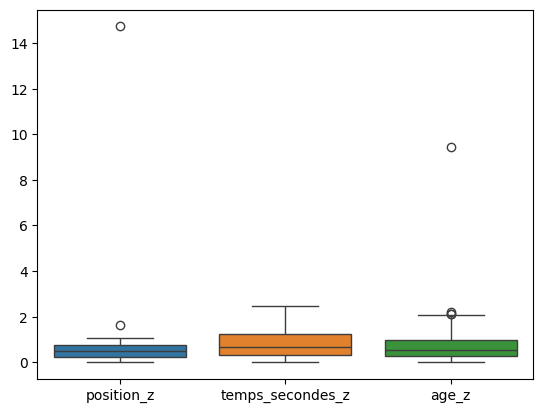

In [108]:
import seaborn as sns

sns.boxplot(df_std)

_Recherche numérique_

In [123]:
limit = 3

outliers = df_std.loc[df_std.values > limit]
outliers.head()

,position_z,temps_secondes_z,age_z
264,14.730320,0.827154,0.635031
302,0.751906,1.259326,9.456728


In [110]:
# avec sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
  
# transform data 
limit = 3
d = df[['Position', 'Temps_secondes', 'Age']]
outliers_std = pd.DataFrame(scaler.fit_transform(d), columns=d.columns)
outliers = outliers_std.loc[outliers_std.values > limit]
outliers.head()

[1.77291667e+02 7.80554190e+05 4.21458333e+01]


,Position,Temps_secondes,Age
260,14.730320,0.827154,0.635031
298,0.751906,1.259326,9.456728


Q5

In [117]:
#df[['Position', 'Temps_secondes']].duplicated()
df.loc[df['Temps_secondes'].duplicated(keep=False), :]

,Position,Sexe,Temps,Dept,Temps_secondes,Age,time
28,29,M,00:37:07,76,779827,31.0,1900-01-01 00:37:07
29,30,M,00:37:07,76,779827,25.0,1900-01-01 00:37:07
57,58,M,00:40:41,76,780041,65.0,1900-01-01 00:40:41
58,59,M,00:40:41,27,780041,42.0,1900-01-01 00:40:41
62,63,M,00:41:13,76,780073,53.0,1900-01-01 00:41:13
...,...,...,...,...,...,...,...
328,329,F,01:06:07,27,781567,20.0,1900-01-01 01:06:07
329,330,F,01:06:07,27,781567,28.0,1900-01-01 01:06:07
330,331,F,01:06:07,27,781567,29.0,1900-01-01 01:06:07
337,338,M,01:09:31,27,781771,24.0,1900-01-01 01:09:31


Q6

In [124]:
df.Sexe.unique()
df.Position.mode()

0      -100
1         1
2         2
3         3
4         4
       ... 
331     337
332     338
333     339
334     340
335    2640
Name: Position, Length: 336, dtype: int64